In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
import pingouin as pg

In [27]:
data = pd.read_csv("df.csv")

In [28]:
data["degrees"] = data["degrees"].apply(lambda x: [int(char) for char in str(x) if char.isdigit()])

In [29]:
data

,sp,boite,mesure,photo,nodes,edges,degrees,cycle density,total hyphal length,spatial density
0,gigaspora,9,1,G09_10_06_P01.pkl,557,569,"[1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, ...",0.023339,28725.514643,0.003309
1,gigaspora,9,1,G09_10_06_P02.pkl,76,79,"[1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, ...",0.052632,5330.277195,0.003620
2,gigaspora,9,1,G09_10_06_P03.pkl,885,912,"[1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, ...",0.031638,33950.541583,0.004256
3,gigaspora,9,2,G09_16_06_P01.pkl,67,77,"[1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, ...",0.164179,2617.996602,0.080725
4,gigaspora,9,2,G09_16_06_P02.pkl,160,166,"[1, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, ...",0.043750,14827.655045,0.003461
...,...,...,...,...,...,...,...,...,...,...
178,rhizophagus,25,1,R25_23_06_P03.pkl,3583,3823,"[1, 1, 1, 1, 1, 1]",0.067262,101128.997582,0.005506
179,rhizophagus,25,1,R25_23_06_P04.pkl,2433,2604,"[1, 1, 1, 1, 1, 1]",0.070695,71556.774556,0.003800
180,rhizophagus,25,1,R25_23_06_P05.pkl,1287,1327,"[1, 1, 3, 1, 3, 1]",0.031857,29028.233648,0.004384
181,rhizophagus,25,1,R25_23_06_P06.pkl,2553,2667,"[1, 3, 1, 3, 1, 1]",0.045045,62913.837083,0.005678


In [32]:
data_week1 = data[data['mesure'] == 1]
data_week2 = data[data['mesure'] == 2]
data_week3 = data[data['mesure'] == 3]
data_week4 = data[data['mesure'] == 4]

In [31]:
data_week1

,sp,boite,mesure,photo,nodes,edges,degrees,cycle density,total hyphal length,spatial density
0,gigaspora,9,1,G09_10_06_P01.pkl,557,569,"[1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, ...",0.023339,28725.514643,0.003309
1,gigaspora,9,1,G09_10_06_P02.pkl,76,79,"[1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, ...",0.052632,5330.277195,0.003620
2,gigaspora,9,1,G09_10_06_P03.pkl,885,912,"[1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, ...",0.031638,33950.541583,0.004256
22,rhizophagus,1,1,R01_16_06_P01.pkl,340,357,"[1, 1, 1, 3, 1, 3, 3, 1, 4, 1, 3, 3, 1, 1, 4, ...",0.052941,13474.658653,0.004671
23,rhizophagus,1,1,R01_16_06_P02.pkl,87,92,"[1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, ...",0.068966,7576.429812,0.004251
33,rhizophagus,2,1,R02_10_06_P01.pkl,156,157,"[1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, ...",0.012821,4044.135005,0.009983
34,rhizophagus,2,1,R02_10_06_P02.pkl,2500,2615,"[1, 1, 1, 1, 1, 1]",0.046400,65498.189363,0.005284
35,rhizophagus,2,1,R02_10_06_P03.pkl,5533,5873,"[1, 1, 1, 1, 1, 1]",0.061630,190424.984891,0.004208
36,rhizophagus,2,1,R02_10_06_P04.pkl,556,580,"[1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, ...",0.044964,18179.234407,0.005840
65,rhizophagus,3,1,R03_16_06.pkl,206,217,"[1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, ...",0.058252,5146.324194,0.008733


In [74]:
data_week1["sp"].value_counts()

sp
rhizophagus    24
gigaspora       3
Name: count, dtype: int64

In [ ]:
pg.

In [46]:
# normalité
print(pg.normality(data_week1["nodes"]))                                    # Univariate normality
# print(pg.multivariate_normality(np.column_stack((data_week1["nodes"], data_week1["boite"])))) # Multivariate normality

              W      pval  normal
nodes  0.738129  0.000014   False


In [62]:
# homogénéité des variances Levene
pg.homoscedasticity(data_week1, dv = "nodes", group = "sp")

,W,pval,equal_var
levene,0.750372,0.394596,True


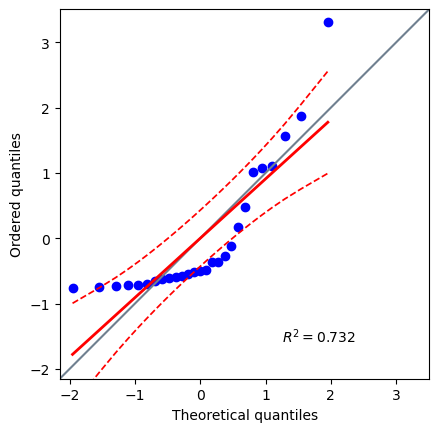

In [37]:
ax = pg.qqplot(data_week1["nodes"], dist='norm')

In [60]:
pg.ttest(data_week1[data_week1["sp"] == "gigaspora"]["nodes"], 
         data_week1[data_week1["sp"] == "rhizophagus"]["nodes"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.616888,10.982632,two-sided,0.134239,"[-1442.88, 220.88]",0.437813,1.047,0.105712


In [77]:
pg.pairwise_tests(data = data_week3, dv = "nodes", between = "sp", parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,sp,gigaspora,rhizophagus,False,False,116.0,two-sided,0.000104,-1.11344


In [66]:
X = pd.get_dummies(data_week1['sp'], drop_first=True)
y = data_week1['nodes']
lm = pg.linear_regression(X, y)
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,506.0,805.735060,0.627998,0.535700,0.020036,-0.019162,-1153.442419,2165.442419
1,rhizophagus,611.0,854.611087,0.714945,0.481267,0.020036,-0.019162,-1149.104481,2371.104481


In [67]:
pg.corr(data_week1["edges"], data_week1["total hyphal length"])

,n,r,CI95%,p-val,BF10,power
pearson,27,0.982897,"[0.96, 0.99]",6.841424e-20,2.261e+16,1.0


In [68]:
pg.corr(data_week1["spatial density"], data_week1["total hyphal length"])

,n,r,CI95%,p-val,BF10,power
pearson,27,-0.317266,"[-0.62, 0.07]",0.106847,0.822,0.372705


In [69]:
pg.corr(data_week1["spatial density"], data_week1["nodes"])

,n,r,CI95%,p-val,BF10,power
pearson,27,-0.296368,"[-0.61, 0.09]",0.133339,0.697,0.330173


In [70]:
pg.pairwise_tukey(data = data_week1, dv = "nodes", between = "sp")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,gigaspora,rhizophagus,506.0,1117.0,-611.0,854.611087,-0.714945,0.481267,-0.424546
